In [86]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
import pandas as pd
from IPython.display import display

from graphing import *
import numpy as np
from matplotlib import pyplot as plt

import re

%autoreload

In [69]:
df = pd.read_csv("logs/day2_tnt.csv")
df = df.rename(columns={"INTERFACE_CODE":"label", "Elapsed":"Latency"})
df['timeStamp']=pd.to_datetime(df['End'])
# I'm assuming we want to count the number of a given INTERFACE_CODE within our resampling.
df['threadName'] = df['label']

# Metric intervals shouldn't matter because we're not segmenting
tests = Test(df, 60*5, False, True)

# I need to convert the times! Mild nightmare just trying to load it in.

C:\Users\akeshmistry\AppData\Local\Temp\ipykernel_11584\3403737045.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timeStamp']=pd.to_datetime(df['End'])


In [70]:
tests.unit_tests_interpolate_avg_res()

In [73]:
tests.unit_tests_dict['TPG-R2-L017-OrderEvent'].results

,avg_res,txn_per_sec
timeStamp,,
2023-07-21 10:05:00,16.800000,0.083333
2023-07-21 10:10:00,14.800000,0.000000
2023-07-21 10:15:00,12.800000,0.083333
2023-07-21 10:20:00,14.040000,0.000000
2023-07-21 10:25:00,15.280000,0.083333
...,...,...
2023-07-21 17:25:00,14.000000,0.126667
2023-07-21 17:30:00,15.884615,0.000000
2023-07-21 17:35:00,17.769231,0.086667


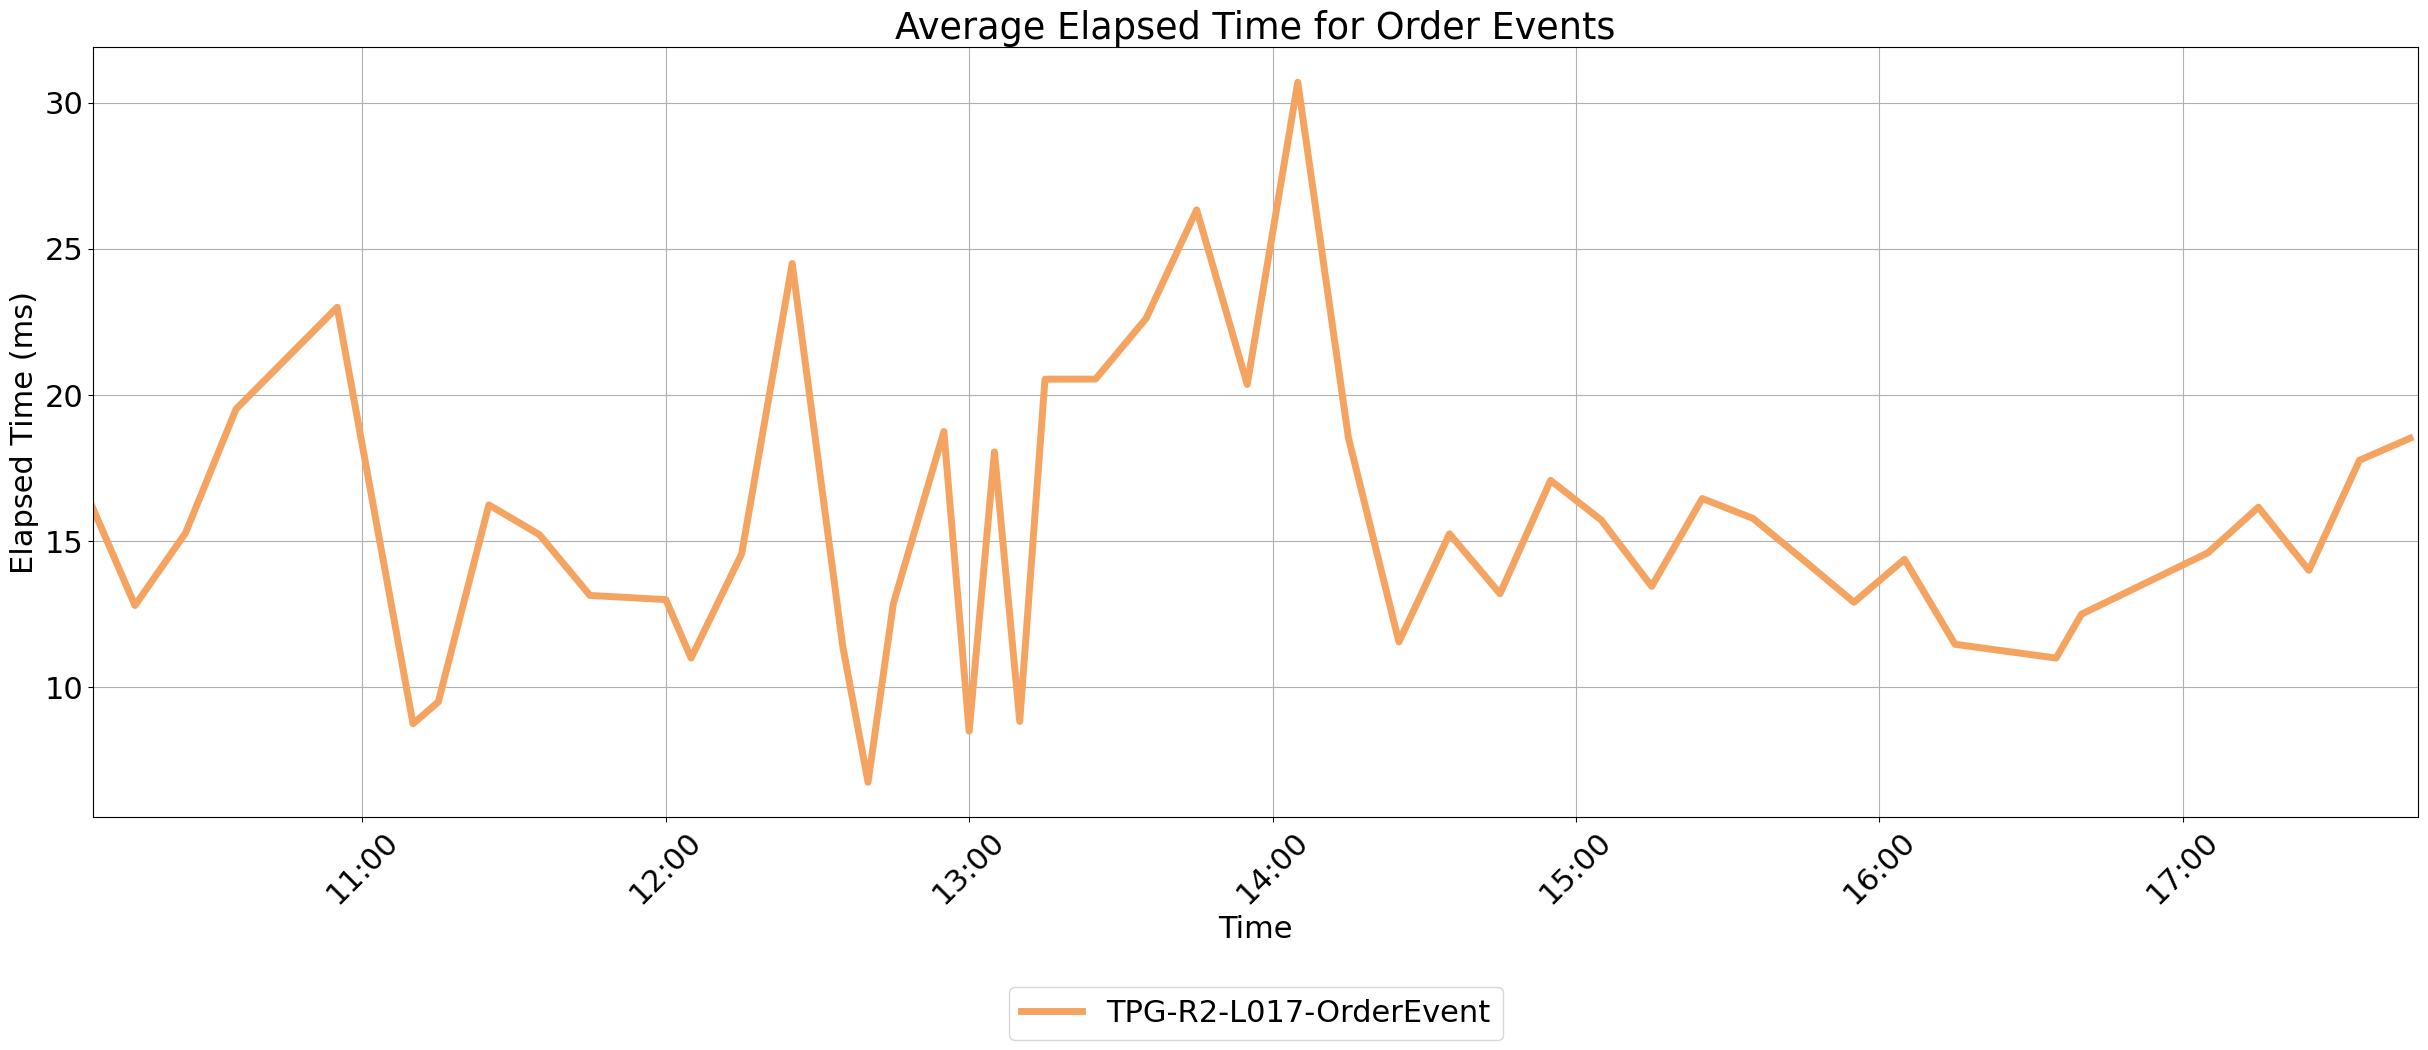

In [108]:
tests.time_series_unit('TPG-R2-L017-OrderEvent', "Average Elapsed Time for Order Events", "avg_res", "Elapsed Time (ms)")

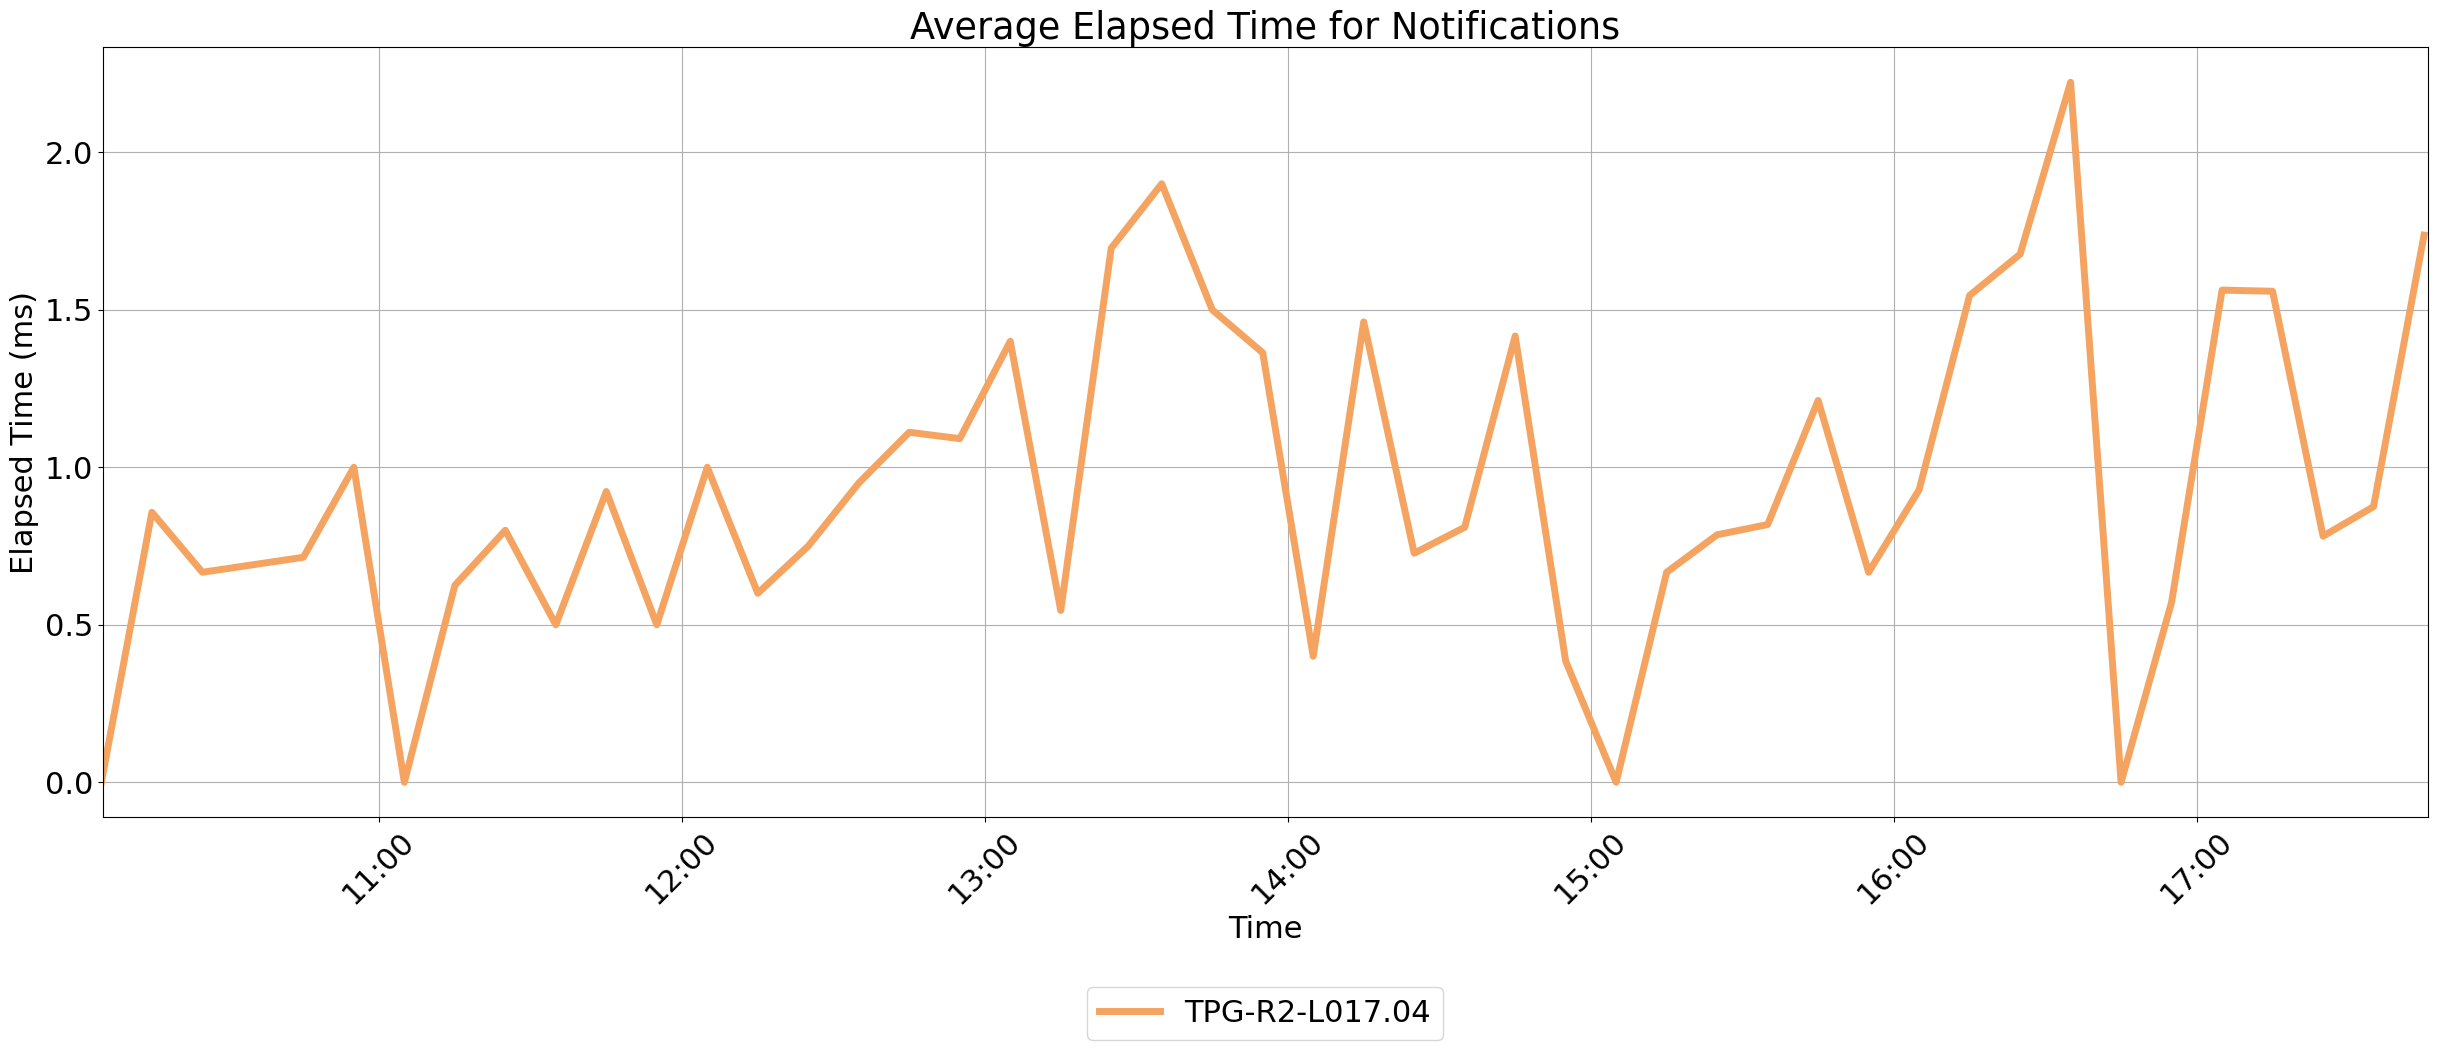

In [105]:
tests.time_series_unit('TPG-R2-L017.04', "Average Elapsed Time for Notifications", "avg_res", "Elapsed Time (ms)")

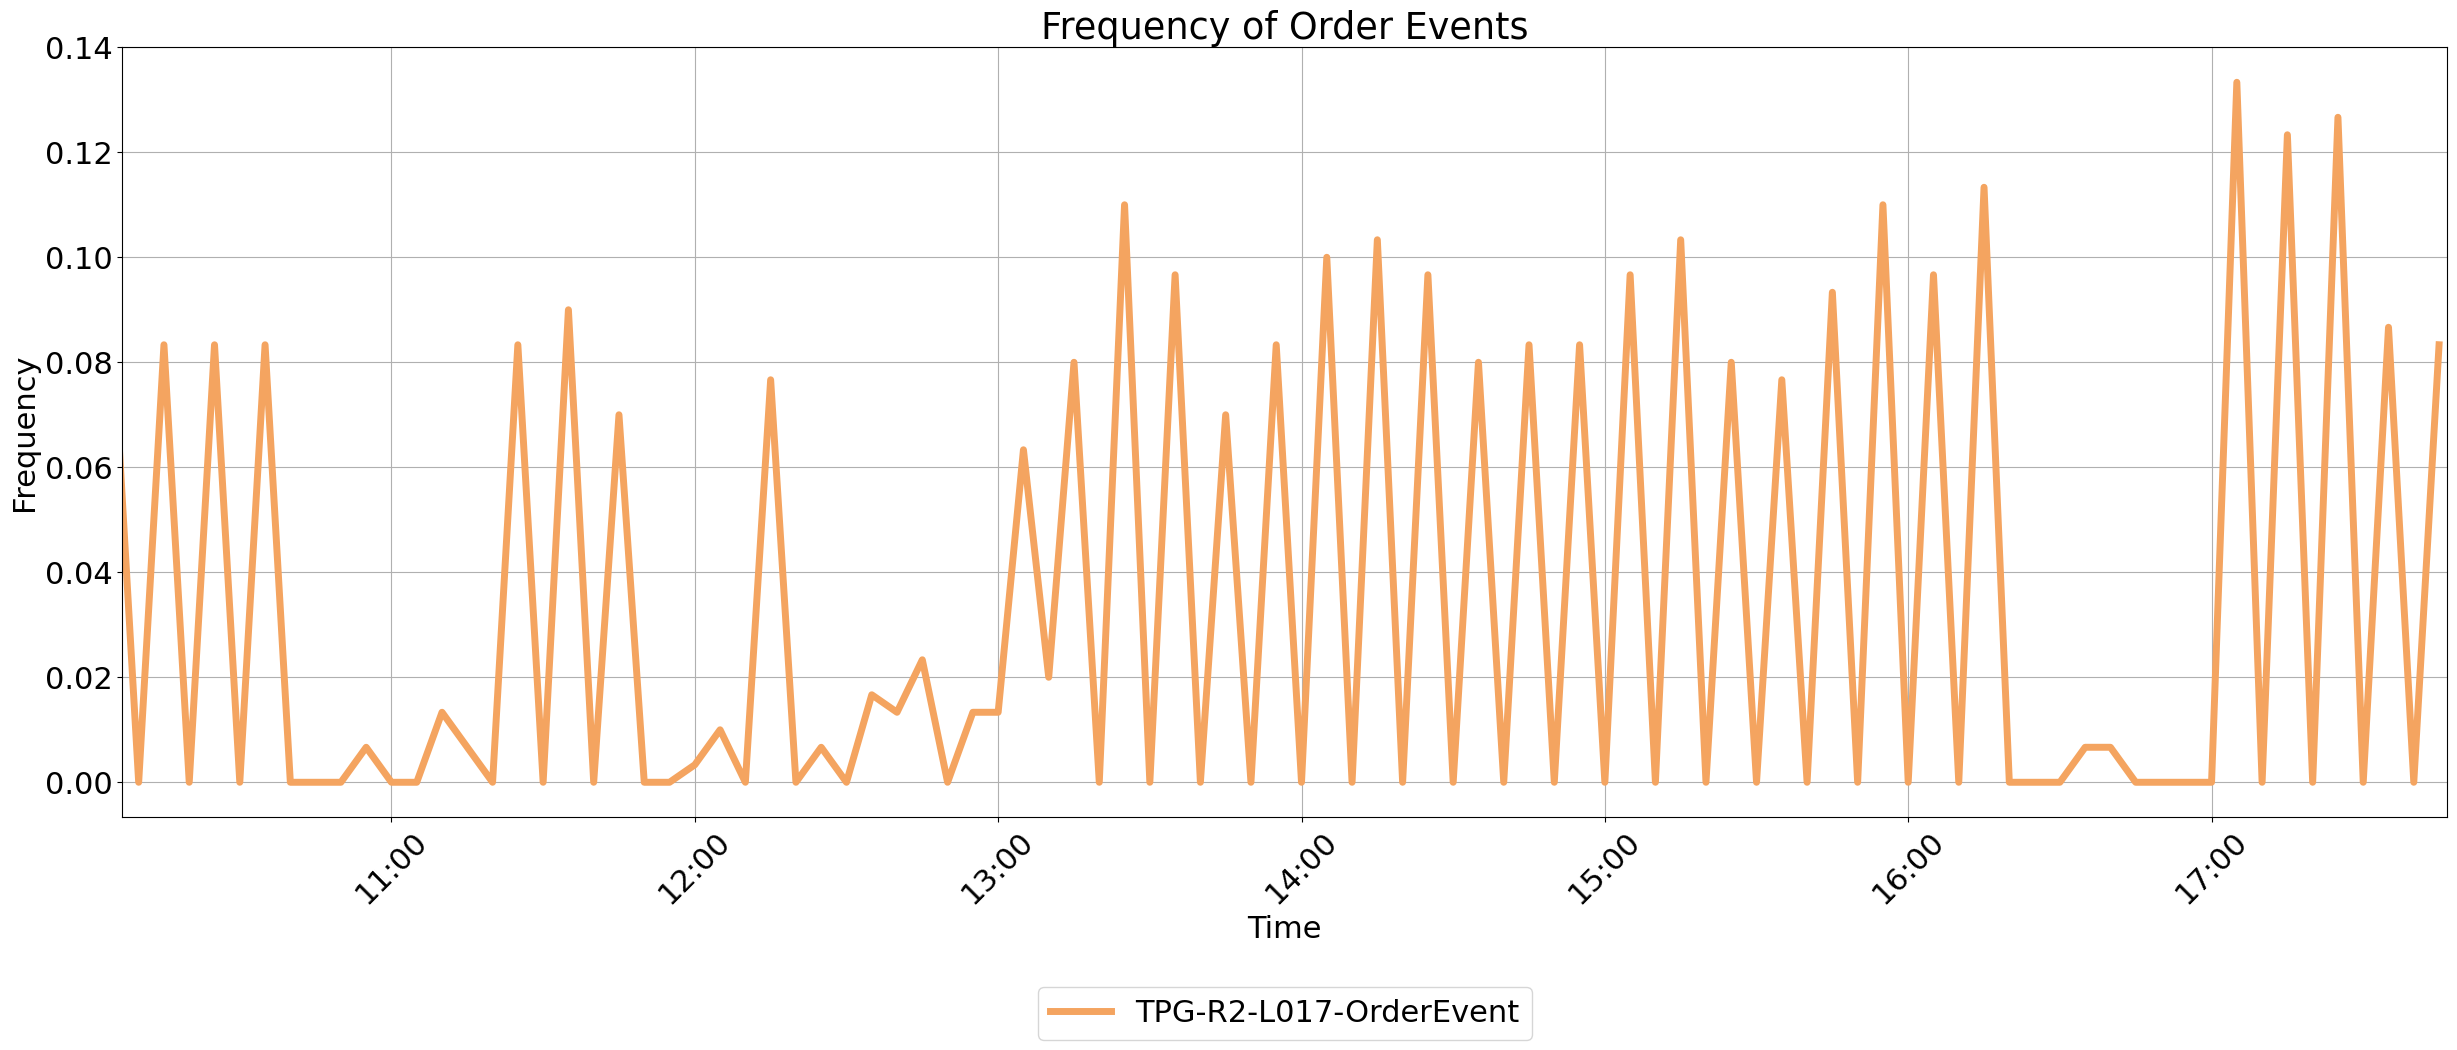

In [106]:
tests.time_series_unit('TPG-R2-L017-OrderEvent', "Frequency of Order Events", "txn_per_sec", "Frequency")

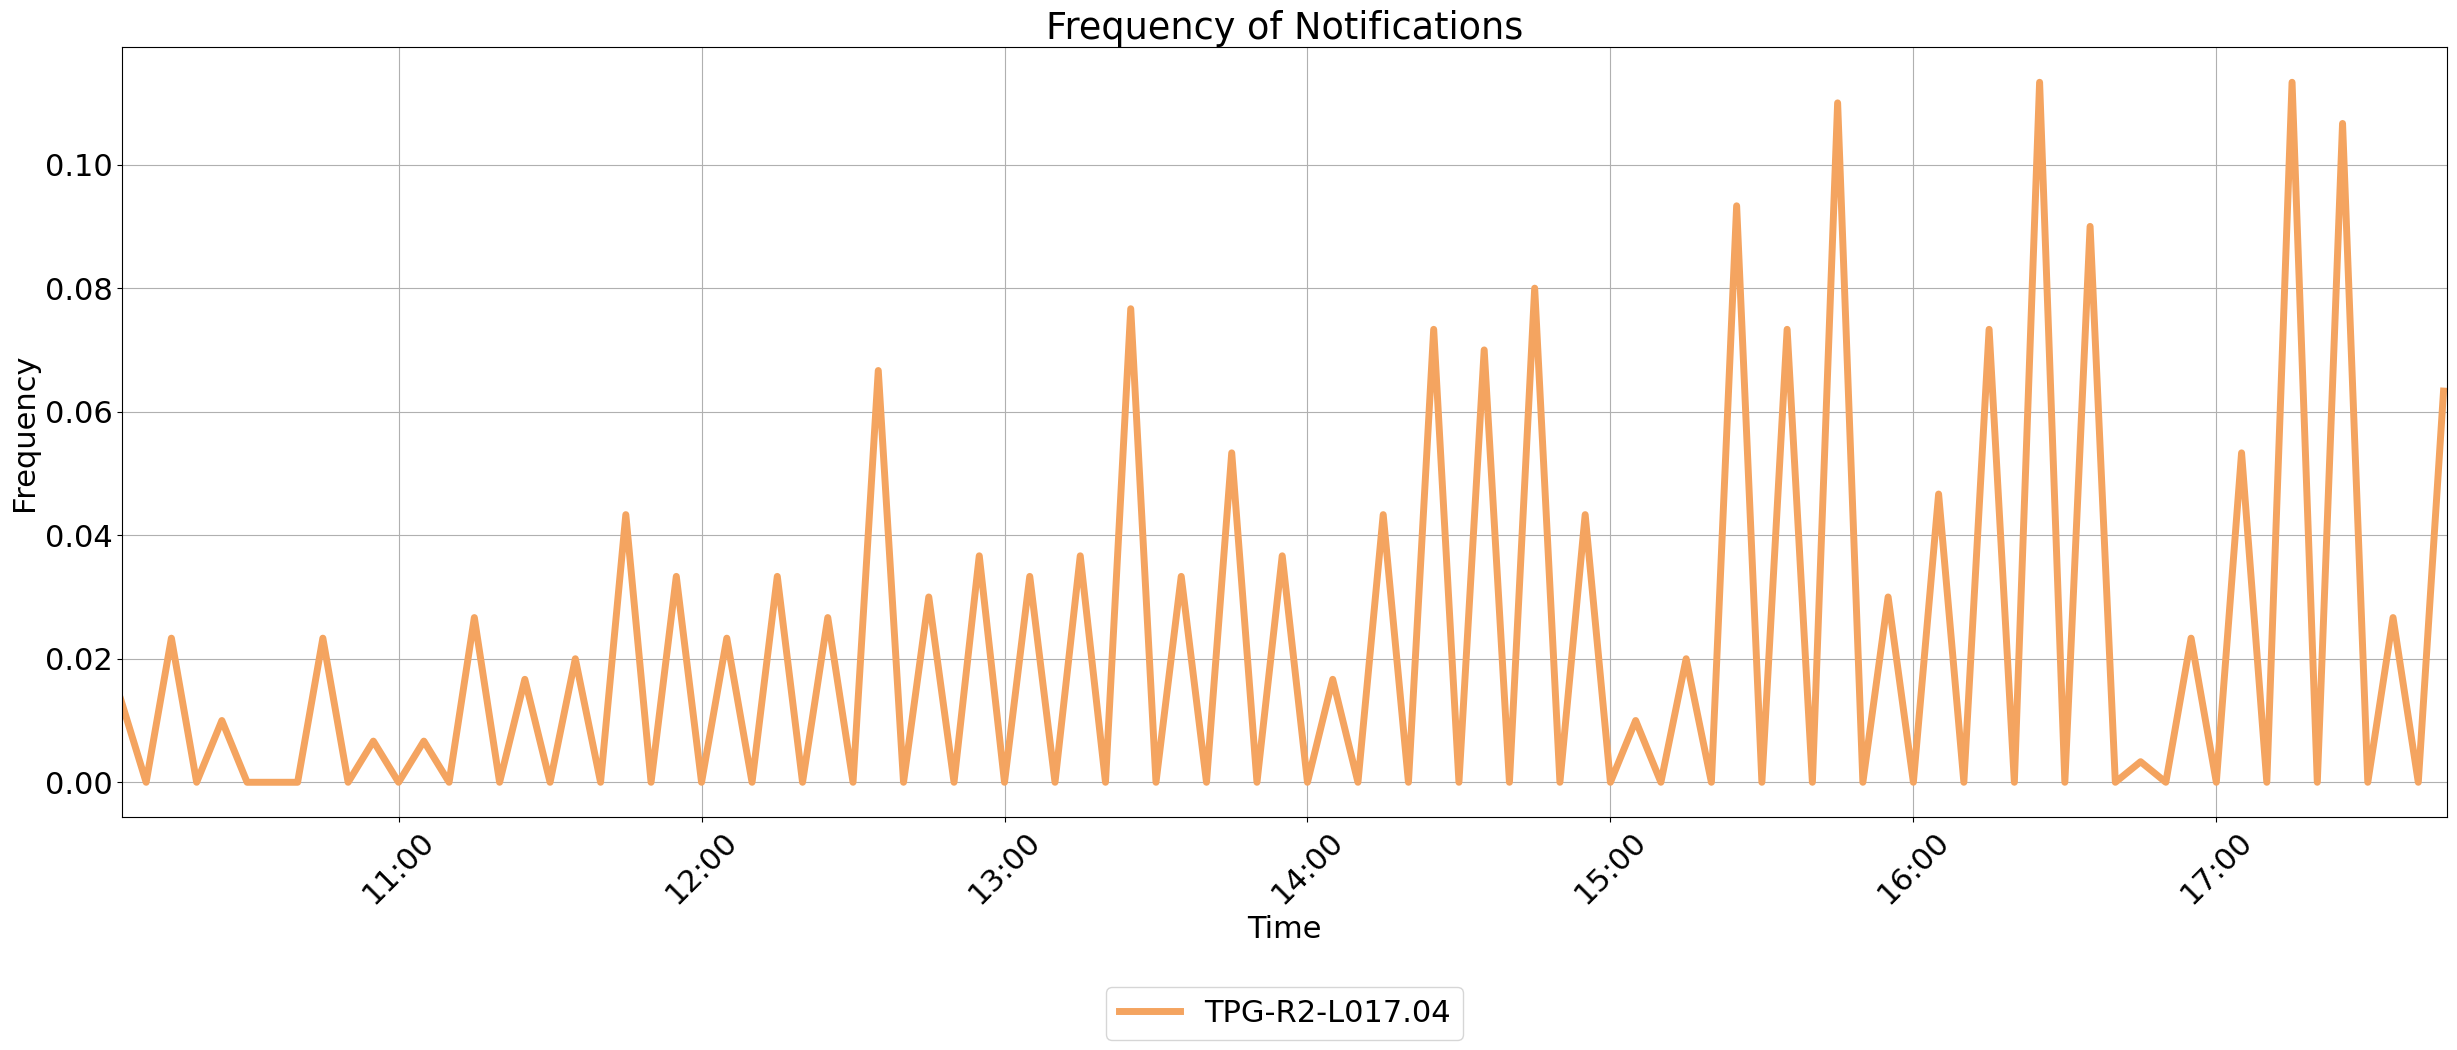

In [107]:
tests.time_series_unit('TPG-R2-L017.04', "Frequency of Notifications", "txn_per_sec", "Frequency")